# Sentiment Analysis

Import packages and import data

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import wordpunct_tokenize
from string import punctuation
from nltk.corpus import stopwords
import re
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# PULL IN FULL DATASET - TO DO

In [2]:
data = pd.read_csv('data/sentiment_test.csv')

In [3]:
print("Number of sentences in the dataset:", len(data))

Number of sentences in the dataset: 18462


### Pre-processing Data

In [4]:
# setup
sentences = data['article_text']

Remove punctuation, numbers, stopwords and make lowercase w/out tokenization by word

In [5]:
# lowercase everything
sentences = [sentences.lower() for sentences in sentences]

# remove punctuation
sentences = [s.replace("’s",'') for s in sentences] # remove apostrophe s first
sentences = [re.sub(r'[^\w\s]','',s) for s in sentences]

# remove numbers
sentences = [re.sub('[0-9]','', s) for s in sentences]

# remove double space
sentences = [s.replace("  ",' ') for s in sentences]

# remove stopwords
clean = []
for item in sentences:
    for word in stopwords.words('english'):
        item = item.replace(" " + word + " ", ' ')
    clean.append(item)

data['article_text_clean'] = clean

# tokenize - bag of words
#bag_of_words = []
#for item in clean:
    #item = wordpunct_tokenize(item)
    #bag_of_words.append(item)

In [6]:
print("Pre-cleaned text:", data['article_text'][300] + '\n')
print("Cleaned text:", data['article_text_clean'][300])

Pre-cleaned text:  Biden’s victory in ten out of 14 states that voted on Tuesday put new life into a campaign that was left for dead just weeks before when Sen

Cleaned text:  biden victory ten states voted tuesday put new life campaign left dead weeks sen


### 1. Rule/Lexicon-based methods

- Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.
- Helpful article that breaks down the many different approaches: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

a) TextBlob: Simple rule-based API for sentiment analysis
- Uses a sentiment lexicon (consisting of predefined words) to assign scores for each word, which are then averaged out using a weighted average to give an overall sentence sentiment score.
- Return a tuple of form (polarity, subjectivity ) where polarity is a float within the range [-1.0, 1.0] and subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
- Documentation: https://textblob.readthedocs.io/en/dev/quickstart.html

In [10]:
# import packages
from textblob import TextBlob

# setup
text = data['article_text_clean']

Run Sentiment Analysis with TextBlob

In [11]:
score = []
for sentence in text:
    sentence = TextBlob(sentence)
    x = sentence.sentiment
    x = sentence.sentiment.polarity
    score.append(x)

data['score'] = score

# Convert float score to category based on binning to get 5 levels
data['sentiment'] = pd.cut(data['score'],
                    bins=5,
                    labels=[1, 2, 3, 4, 5])
data['sentiment'] = pd.to_numeric(data['sentiment'])
data = data.drop('score', axis=1)

Sentiment by Publisher: Averages, Distribution and Examples

In [25]:
# get average sentiment per publisher
publishers = data.groupby('publisher')['sentiment'].mean().reset_index()
print(publishers)

          publisher  sentiment
0                AP   3.149310
1         Breitbart   3.124031
2               Fox   3.132970
3          buzzfeed   3.184232
4               nbc   3.195496
5    new_york_times   3.099262
6          politico   3.118523
7  washington_times   3.087702


In [26]:
# AP sentiment
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP['sentiment'].sort_values(ascending=True)
# get sentiment counts
AP_sent_count = AP_sent.value_counts().sort_index()
# get percent per sentiment category
AP_1 = AP_sent_count[1]/len(AP_sent)
AP_2 = AP_sent_count[2]/len(AP_sent)
AP_3 = AP_sent_count[3]/len(AP_sent)
AP_4 = AP_sent_count[4]/len(AP_sent)
AP_5 = AP_sent_count[5]/len(AP_sent)

# Breitbart sentiment
Breitbart = data.loc[data['publisher'] == "Breitbart"]
Breitbart_sent = Breitbart['sentiment'].sort_values(ascending=True)
# get sentiment counts
Breitbart_sent_count = Breitbart_sent.value_counts().sort_index()
# get percent per sentiment category
Breitbart_1 = Breitbart_sent_count[1]/len(Breitbart_sent)
Breitbart_2 = Breitbart_sent_count[2]/len(Breitbart_sent)
Breitbart_3 = Breitbart_sent_count[3]/len(Breitbart_sent)
Breitbart_4 = Breitbart_sent_count[4]/len(Breitbart_sent)
Breitbart_5 = Breitbart_sent_count[5]/len(Breitbart_sent)

# Fox sentiment
Fox = data.loc[data['publisher'] == "Fox"]
Fox_sent = Fox['sentiment'].sort_values(ascending=True)
# get sentiment counts
Fox_sent_count = Fox_sent.value_counts().sort_index()
# get percent per sentiment category
Fox_1 = Fox_sent_count[1]/len(Fox_sent)
Fox_2 = Fox_sent_count[2]/len(Fox_sent)
Fox_3 = Fox_sent_count[3]/len(Fox_sent)
Fox_4 = Fox_sent_count[4]/len(Fox_sent)
Fox_5 = Fox_sent_count[5]/len(Fox_sent)

# Buzzfeed sentiment
buzzfeed = data.loc[data['publisher'] == "buzzfeed"]
buzzfeed_sent = buzzfeed['sentiment'].sort_values(ascending=True)
# get sentiment counts
buzzfeed_sent_count = buzzfeed_sent.value_counts().sort_index()
# get percent per sentiment category
buzzfeed_1 = buzzfeed_sent_count[1]/len(buzzfeed_sent)
buzzfeed_2 = buzzfeed_sent_count[2]/len(buzzfeed_sent)
buzzfeed_3 = buzzfeed_sent_count[3]/len(buzzfeed_sent)
buzzfeed_4 = buzzfeed_sent_count[4]/len(buzzfeed_sent)
buzzfeed_5 = buzzfeed_sent_count[5]/len(buzzfeed_sent)

# NBC
nbc = data.loc[data['publisher'] == "nbc"]
nbc_sent = nbc['sentiment'].sort_values(ascending=True)
# get sentiment counts
nbc_sent_count = nbc_sent.value_counts().sort_index()
# get percent per sentiment category
nbc_1 = nbc_sent_count[1]/len(nbc_sent)
nbc_2 = nbc_sent_count[2]/len(nbc_sent)
nbc_3 = nbc_sent_count[3]/len(nbc_sent)
nbc_4 = nbc_sent_count[4]/len(nbc_sent)
nbc_5 = nbc_sent_count[5]/len(nbc_sent)

# New York Times
new_york_times = data.loc[data['publisher'] == "new_york_times"]
new_york_times_sent = new_york_times['sentiment'].sort_values(ascending=True)
# get sentiment counts
new_york_times_sent_count = new_york_times_sent.value_counts().sort_index()
# get percent per sentiment category
new_york_times_1 = new_york_times_sent_count[1]/len(new_york_times_sent)
new_york_times_2 = new_york_times_sent_count[2]/len(new_york_times_sent)
new_york_times_3 = new_york_times_sent_count[3]/len(new_york_times_sent)
new_york_times_4 = new_york_times_sent_count[4]/len(new_york_times_sent)
new_york_times_5 = new_york_times_sent_count[5]/len(new_york_times_sent)

# Politico
politico = data.loc[data['publisher'] == "politico"]
politico_sent = politico['sentiment'].sort_values(ascending=True)
# get sentiment counts
politico_sent_count = politico_sent.value_counts().sort_index()
# get percent per sentiment category
politico_1 = politico_sent_count[1]/len(politico_sent)
politico_2 = politico_sent_count[2]/len(politico_sent)
politico_3 = politico_sent_count[3]/len(politico_sent)
politico_4 = politico_sent_count[4]/len(politico_sent)
politico_5 = politico_sent_count[5]/len(politico_sent)

# Washington Times
washington_times = data.loc[data['publisher'] == "washington_times"]
washington_times_sent = washington_times['sentiment'].sort_values(ascending=True)
# get sentiment counts
washington_times_sent_count = washington_times_sent.value_counts().sort_index()
# get percent per sentiment category
washington_times_1 = washington_times_sent_count[1]/len(washington_times_sent)
washington_times_2 = washington_times_sent_count[2]/len(washington_times_sent)
washington_times_3 = washington_times_sent_count[3]/len(washington_times_sent)
washington_times_4 = washington_times_sent_count[4]/len(washington_times_sent)
washington_times_5 = washington_times_sent_count[5]/len(washington_times_sent)

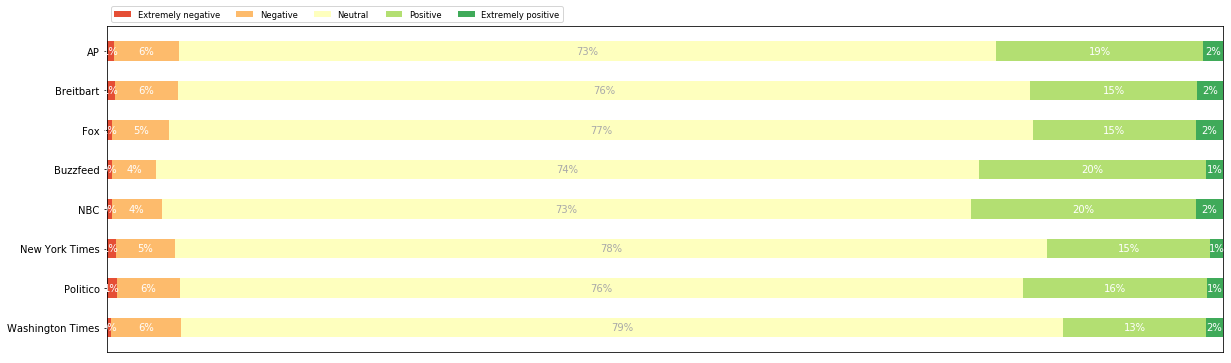

In [36]:
# plot sentiment breakdown by publisher
# code from: https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html
category_names = ['Extremely negative', 'Negative','Neutral', 'Positive', 'Extremely positive']
publishers = {
    'AP': [AP_1, AP_2, AP_3, AP_4, AP_5],
    'Breitbart': [Breitbart_1, Breitbart_2, Breitbart_3, Breitbart_4, Breitbart_5],
    'Fox': [Fox_1, Fox_2, Fox_3, Fox_4, Fox_5],
    'Buzzfeed': [buzzfeed_1, buzzfeed_2, buzzfeed_3, buzzfeed_4, buzzfeed_5],
    'NBC': [nbc_1, nbc_2, nbc_3, nbc_4, nbc_5],
    'New York Times': [new_york_times_1, new_york_times_2, new_york_times_3, new_york_times_4, new_york_times_5],
    'Politico': [politico_1, politico_2, politico_3, politico_4, politico_5],
    'Washington Times': [washington_times_1, washington_times_2, washington_times_3, washington_times_4, washington_times_5]
}

def survey(publishers, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(publishers.keys())
    data = np.array(list(publishers.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str("{0:.0%}".format(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(publishers, category_names)
plt.show()

In [34]:
# check an examples of sentences in each category
# no way to evaluate other than checking a few randomly within each group

# Extremely negative - 1
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP[['sentiment', 'article_text']]
AP_sent_1 = AP_sent.loc[data['sentiment'] == 1].reset_index().drop(columns='index')
for item in AP_sent_1['article_text'].sample():
    print("Extremely Negative (1) Example:", item + '\n')
    
# Negative - 2
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP[['sentiment', 'article_text']]
AP_sent_2 = AP_sent.loc[data['sentiment'] == 2].reset_index().drop(columns='index')
for item in AP_sent_2['article_text'].sample():
    print("Negative (2) Example:", item + '\n')
    
# Neutral - 3
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP[['sentiment', 'article_text']]
AP_sent_3 = AP_sent.loc[data['sentiment'] == 3].reset_index().drop(columns='index')
for item in AP_sent_3['article_text'].sample():
    print("Neutral (3) Example:", item + '\n')

# Positive - 4
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP[['sentiment', 'article_text']]
AP_sent_4 = AP_sent.loc[data['sentiment'] == 4].reset_index().drop(columns='index')
for item in AP_sent_4['article_text'].sample():
    print("Positive (4) Example:", item + '\n')

# Extremely positive - 5
AP = data.loc[data['publisher'] == "AP"]
AP_sent = AP[['sentiment', 'article_text']]
AP_sent_5 = AP_sent.loc[data['sentiment'] == 5].reset_index().drop(columns='index')
for item in AP_sent_5['article_text'].sample():
    print("Extremely Positive (5) Example:", item)

Extremely Negative (1) Example:   After that, though, Democrats’ desperate desire to defeat Trump could affect his calculus

Negative (2) Example: ” Biden, code-named “Celtic,” had Secret Service protection from the time he was selected as Barack Obama’s running mate through about six months after his term as vice president expired in 2017

Neutral (3) Example: WASHINGTON (AP) — The Trump administration has upgraded its already dire warning to Americans against all international travel as the coronavirus outbreak spreads

Positive (4) Example:  “An overwhelming percentage of his discourse is about attacking others, and he simply has more enemies now,” said Ott, explaining why Trump’s speeches may be getting longer

Extremely Positive (5) Example:  But Hayes described herself as pragmatic and said she voted for Biden because she thinks he can win


Sentiment by Candidate: Averages and representation by publisher

In [40]:
# calculate average sentiment by candidate and per publisher
# total average
sent_mean = data['sentiment'].mean()

#trump
trump = data.loc[data['Trump'] == 1]
trump_sent_mean = trump['sentiment'].mean()
trump_sentiment = trump.groupby('publisher')['sentiment'].mean().reset_index()

#sanders
sanders = data.loc[data['Sanders'] == 1]
sanders_sent_mean = sanders['sentiment'].mean()
sanders_sentiment = sanders.groupby('publisher')['sentiment'].mean().reset_index()

#biden
biden = data.loc[data['Biden'] == 1]
biden_sent_mean = biden['sentiment'].mean()
biden_sentiment = biden.groupby('publisher')['sentiment'].mean().reset_index()

# warren
warren = data.loc[data['Warren'] == 1]
warren_sent_mean = warren['sentiment'].mean()
warren_sentiment = warren.groupby('publisher')['sentiment'].mean().reset_index()

# buttigieg
buttigieg = data.loc[data['Buttigieg'] == 1]
buttigieg_sent_mean = buttigieg['sentiment'].mean()
buttigieg_sentiment = buttigieg.groupby('publisher')['sentiment'].mean().reset_index()

# bloomberg
bloomberg = data.loc[data['Bloomberg'] == 1]
bloomberg_sent_mean = bloomberg['sentiment'].mean()
bloomberg_sentiment = bloomberg.groupby('publisher')['sentiment'].mean().reset_index()

# klobuchar
klobuchar = data.loc[data['Klobuchar'] == 1]
klobuchar_sent_mean = klobuchar['sentiment'].mean()
klobuchar_sentiment = klobuchar.groupby('publisher')['sentiment'].mean().reset_index()

# yang
yang = data.loc[data['Yang'] == 1]
yang_sent_mean = yang['sentiment'].mean()
yang_sentiment = yang.groupby('publisher')['sentiment'].mean().reset_index()

# steyer
steyer = data.loc[data['Steyer'] == 1]
steyer_sent_mean = steyer['sentiment'].mean()
steyer_sentiment = steyer.groupby('publisher')['sentiment'].mean().reset_index()

# gabbard
gabbard = data.loc[data['Gabbard'] == 1]
gabbard_sent_mean = gabbard['sentiment'].mean()
gabbard_sentiment = gabbard.groupby('publisher')['sentiment'].mean().reset_index()

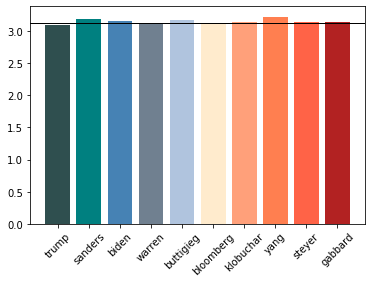

In [41]:
#plot sentiment averages for each candidate
sentiment = [trump_sent_mean, 
             sanders_sent_mean, 
             biden_sent_mean, 
             warren_sent_mean, 
             buttigieg_sent_mean, 
             bloomberg_sent_mean, 
             klobuchar_sent_mean, 
             yang_sent_mean, 
             steyer_sent_mean, 
             gabbard_sent_mean]
candidates = ('trump', 
              'sanders', 
              'biden', 
              'warren', 
              'buttigieg', 
              'bloomberg',
              'klobuchar', 
              'yang', 
              'steyer', 
              'gabbard')

colors = ["darkslategrey", "teal", "steelblue", "slategrey", "lightsteelblue", "blanchedalmond", "lightsalmon", "coral", "tomato", "firebrick"]

plt.bar(candidates, sentiment, color = colors)
plt.xticks(candidates)
plt.xticks(rotation=45)
plt.axhline(y=sent_mean, color='black', linewidth=1) # add line with average of all candidates
plt.show()

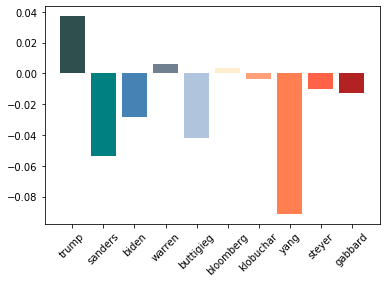

average sentiment: 3.132921676958076


In [42]:
# plot difference in each candidate's sentiment average vs. overall sentiment mean
sentiment = [sent_mean - trump_sent_mean,
             sent_mean - sanders_sent_mean, 
             sent_mean - biden_sent_mean, 
             sent_mean - warren_sent_mean, 
             sent_mean - buttigieg_sent_mean, 
             sent_mean - bloomberg_sent_mean, 
             sent_mean - klobuchar_sent_mean, 
             sent_mean - yang_sent_mean, 
             sent_mean - steyer_sent_mean, 
             sent_mean - gabbard_sent_mean]
candidates = ('trump', 'sanders', 'biden', 'warren', 'buttigieg', 'bloomberg','klobuchar', 'yang', 'steyer', 'gabbard')

colors = ["darkslategrey", "teal", "steelblue", "slategrey", "lightsteelblue", "blanchedalmond", "lightsalmon", "coral", "tomato", "firebrick"]

plt.bar(candidates, sentiment, color=colors)
plt.xticks(candidates)
plt.xticks(rotation=45)
plt.show()
print("average sentiment:", sent_mean)

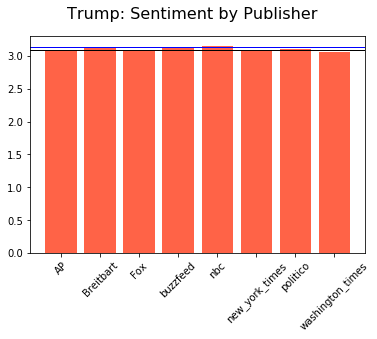

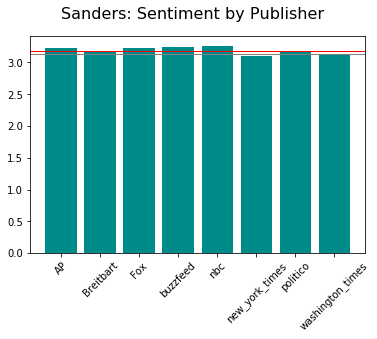

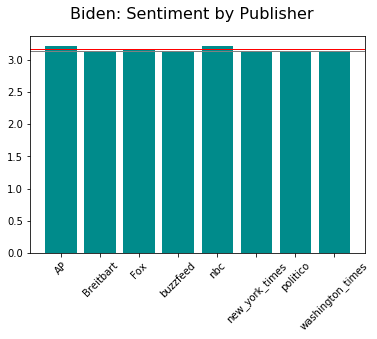

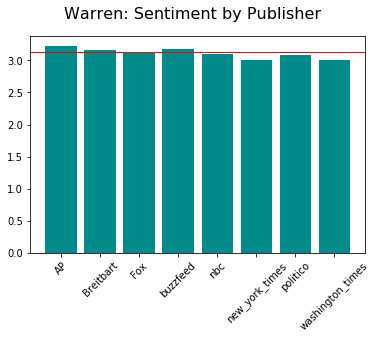

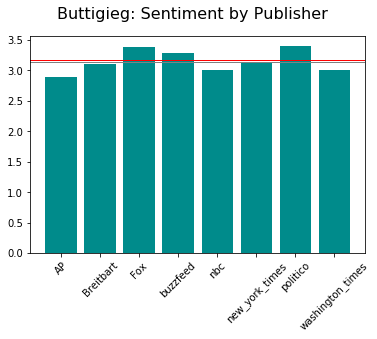

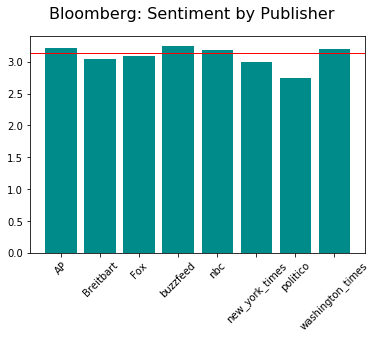

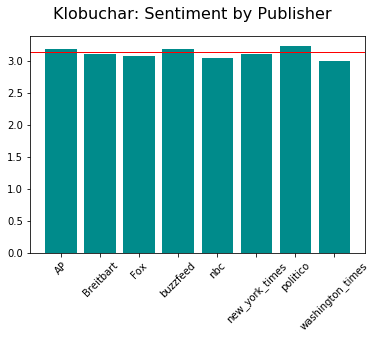

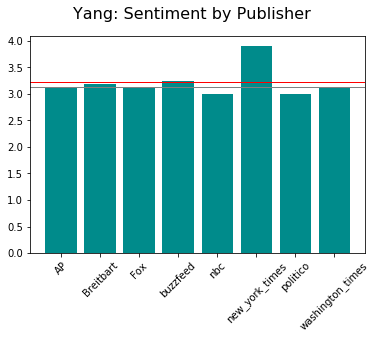

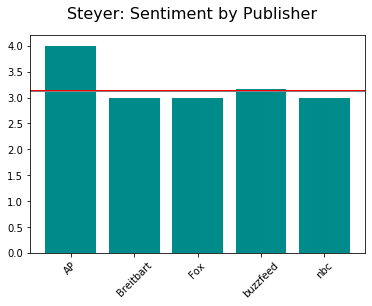

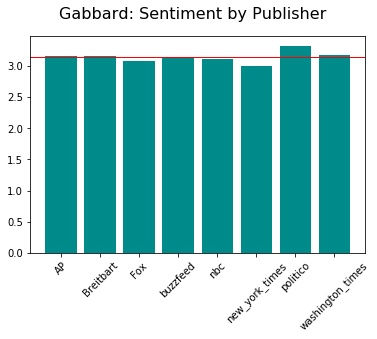

In [43]:
# STILL NEED TO FIGURE OUT HOW TO PUT THESE NEXT TO EACH OTHER FOR A NICE OUTPUT

# plot each candidate's sentiment scores in different outlets
# trump
sentiment = trump_sentiment['sentiment']
outlet = trump_sentiment['publisher']

plt.bar(outlet, sentiment, color = "tomato") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Trump: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='blue', linewidth=1) # add line with average of all candidates
plt.axhline(y=trump_sent_mean, color='black', linewidth=1) # add line with candidate's average
plt.show()

# sanders
sentiment = sanders_sentiment['sentiment']
outlet = sanders_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Sanders: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=sanders_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# biden
sentiment = biden_sentiment['sentiment']
outlet = biden_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Biden: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=biden_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# warren
sentiment = warren_sentiment['sentiment']
outlet = warren_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Warren: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=warren_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# buttigieg
sentiment = buttigieg_sentiment['sentiment']
outlet = buttigieg_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Buttigieg: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=buttigieg_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# bloomberg
sentiment = bloomberg_sentiment['sentiment']
outlet = bloomberg_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Bloomberg: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=bloomberg_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# klobuchar
sentiment = klobuchar_sentiment['sentiment']
outlet = klobuchar_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Klobuchar: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=klobuchar_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# yang
sentiment = yang_sentiment['sentiment']
outlet = yang_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Yang: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=yang_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# steyer
sentiment = steyer_sentiment['sentiment']
outlet = steyer_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Steyer: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=steyer_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# gabbard
sentiment = gabbard_sentiment['sentiment']
outlet = gabbard_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Gabbard: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=gabbard_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

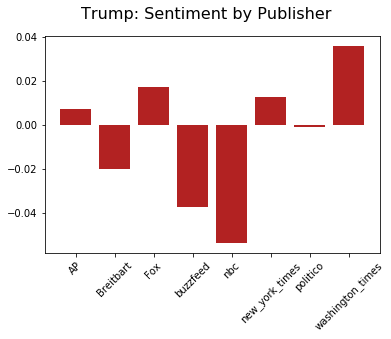

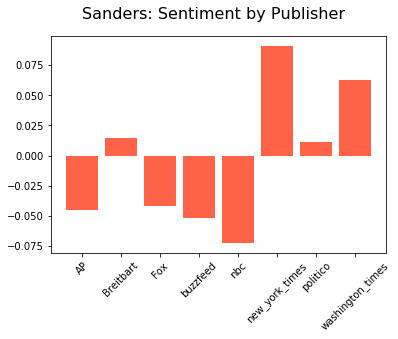

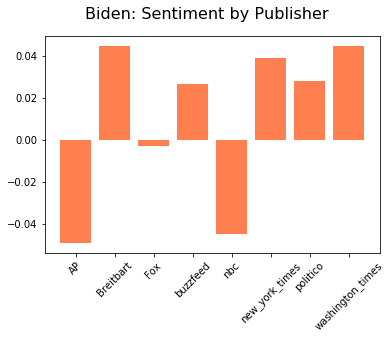

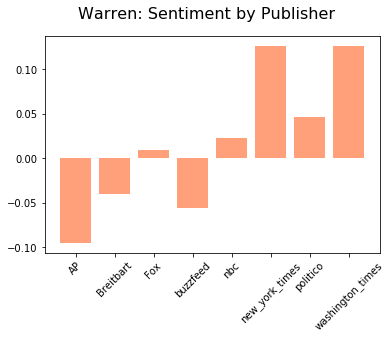

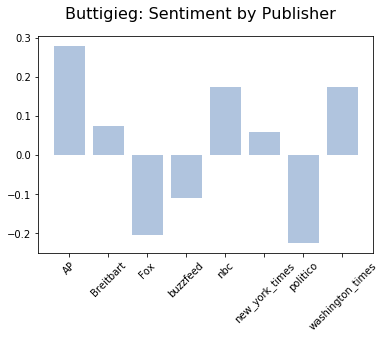

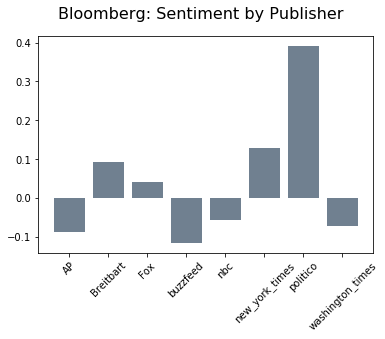

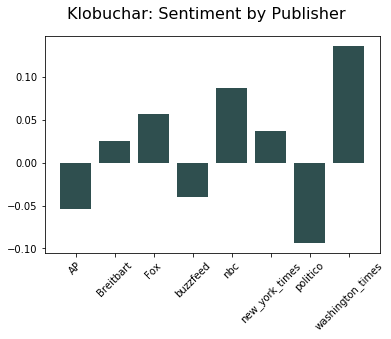

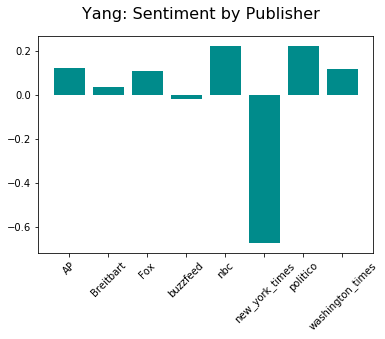

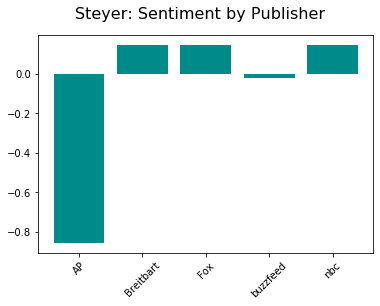

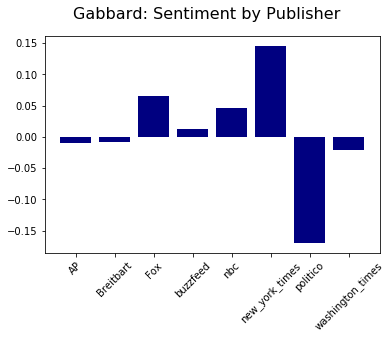

In [50]:
# plot candidate's sentiment score difference in different outlets to their average
# savefig('books_read.png')
# trump
sentiment = trump_sent_mean - trump_sentiment['sentiment']
outlet = trump_sentiment['publisher']

plt.bar(outlet, sentiment, color = "firebrick") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Trump: Sentiment by Publisher', fontsize=16)
plt.show()

# sanders
sentiment = sanders_sent_mean - sanders_sentiment['sentiment']
outlet = sanders_sentiment['publisher']

plt.bar(outlet, sentiment, color = "tomato") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Sanders: Sentiment by Publisher', fontsize=16)
plt.show()

# biden
sentiment = biden_sent_mean - biden_sentiment['sentiment']
outlet = biden_sentiment['publisher']

plt.bar(outlet, sentiment, color = "coral") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Biden: Sentiment by Publisher', fontsize=16)
plt.show()

# warren
sentiment = warren_sent_mean - warren_sentiment['sentiment']
outlet = warren_sentiment['publisher']

plt.bar(outlet, sentiment, color = "lightsalmon") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Warren: Sentiment by Publisher', fontsize=16)
plt.show()

# buttigieg
sentiment = buttigieg_sent_mean - buttigieg_sentiment['sentiment']
outlet = buttigieg_sentiment['publisher']

plt.bar(outlet, sentiment, color = "lightsteelblue") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Buttigieg: Sentiment by Publisher', fontsize=16)
plt.show()

# bloomberg
sentiment = bloomberg_sent_mean - bloomberg_sentiment['sentiment']
outlet = bloomberg_sentiment['publisher']

plt.bar(outlet, sentiment, color = "slategrey") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Bloomberg: Sentiment by Publisher', fontsize=16)
plt.show()

# klobuchar
sentiment = klobuchar_sent_mean - klobuchar_sentiment['sentiment']
outlet = klobuchar_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkslategrey") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Klobuchar: Sentiment by Publisher', fontsize=16)
plt.show()

# yang
sentiment = yang_sent_mean - yang_sentiment['sentiment']
outlet = yang_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Yang: Sentiment by Publisher', fontsize=16)
plt.show()

# steyer
sentiment = steyer_sent_mean - steyer_sentiment['sentiment']
outlet = steyer_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Steyer: Sentiment by Publisher', fontsize=16)
plt.show()

# gabbard
sentiment = gabbard_sent_mean - gabbard_sentiment['sentiment']
outlet = gabbard_sentiment['publisher']

plt.bar(outlet, sentiment, color = "navy") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Gabbard: Sentiment by Publisher', fontsize=16)
plt.show()

In [ ]:
# DO PERCENT SENTIMENT BREAKDOWN BY PUBLISHER BY CANDIDATE IN PRETTY GRAPH

In [ ]:
# within extreme categories - which candidates are the most discussed

Sentiment over time

In [89]:
import warnings
warnings.simplefilter(action='ignore')

In [110]:
# filter sentences only about one candidate
candidate_sentiment = data.loc[data['candidates_mentioned'] == 1]

In [111]:
# create new column with candidate name
candidate_sentiment['candidate'] = candidate_sentiment['article_text'].str.extract('({})'.format('|'.join(candidates)), 
                                                                                   flags = re.IGNORECASE, expand = False).str.lower().fillna('')

candidate_sentiment['candidate'] = np.where(candidate_sentiment['article_text'].str.contains('bernie'), 'sanders', candidate_sentiment['candidate'])

In [112]:
candidate_sentiment = candidate_sentiment[['date', 'sentiment', 'candidate']]

In [113]:
# make dates consistent and filter for time frame
candidate_sentiment['date'] = pd.to_datetime(candidate_sentiment['date'], errors='coerce')
mask = (candidate_sentiment['date'].astype('str') >= "2020-03-01") & (candidate_sentiment['date'].astype('str') < "2020-03-30")
candidate_sentiment = candidate_sentiment.loc[mask]

In [114]:
# mean sentiment per day
mean_per_day = candidate_sentiment.groupby(['date', 'candidate']).mean()

In [115]:
mean_per_day.reset_index(inplace = True)

In [116]:
mean_per_day

,date,candidate,sentiment
0,2020-03-01,trump,3.000000
1,2020-03-02,biden,3.285714
2,2020-03-02,buttigieg,3.000000
3,2020-03-02,klobuchar,3.111111
4,2020-03-02,sanders,3.200000
...,...,...,...
187,2020-03-20,biden,3.181818
188,2020-03-20,bloomberg,3.000000
189,2020-03-20,sanders,3.000000
190,2020-03-20,trump,3.123711


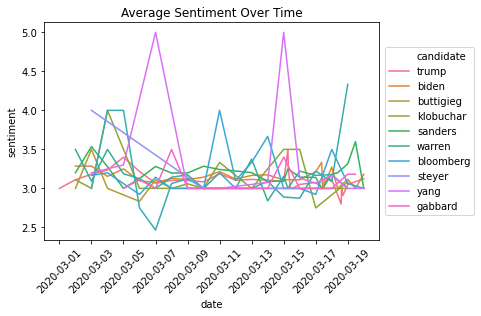

In [118]:
chart = sns.lineplot(x = 'date', y = 'sentiment', hue = 'candidate', data = mean_per_day)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Average Sentiment Over Time')
chart.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

In [ ]:
#sentiment over time
# trump
sentiment = trump['sentiment']
time = trump['date']

#scatter plot with outlet as color
plt.scatter(outlet, sentiment, color = "tomato") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Trump: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='blue', linewidth=1) # add line with average of all candidates
plt.axhline(y=trump_sent_mean, color='black', linewidth=1) # add line with candidate's average
plt.show()

# sanders
sentiment = sanders_sentiment['sentiment']
outlet = sanders_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Sanders: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=sanders_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# biden
sentiment = biden_sentiment['sentiment']
outlet = biden_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Biden: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=biden_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# warren
sentiment = warren_sentiment['sentiment']
outlet = warren_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Warren: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=warren_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# buttigieg
sentiment = buttigieg_sentiment['sentiment']
outlet = buttigieg_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Buttigieg: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=buttigieg_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# bloomberg
sentiment = bloomberg_sentiment['sentiment']
outlet = bloomberg_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Bloomberg: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=bloomberg_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# klobuchar
sentiment = klobuchar_sentiment['sentiment']
outlet = klobuchar_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Klobuchar: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=klobuchar_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# yang
sentiment = yang_sentiment['sentiment']
outlet = yang_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Yang: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=yang_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# steyer
sentiment = steyer_sentiment['sentiment']
outlet = steyer_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Steyer: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=steyer_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

# gabbard
sentiment = gabbard_sentiment['sentiment']
outlet = gabbard_sentiment['publisher']

plt.bar(outlet, sentiment, color = "darkcyan") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Gabbard: Sentiment by Publisher', fontsize=16)
plt.axhline(y=sent_mean, color='grey', linewidth=1) # add line with average of all candidates
plt.axhline(y=gabbard_sent_mean, color='red', linewidth=1) # add line with candidate's average
plt.show()

b) VADER: “Valence Aware Dictionary and sEntiment Reasoner”
- Parsimonious rule-based model for sentiment analysis of social media text.
- VADER is supposed to be better than TextBlob

In [ ]:
# Check F1 score

### 2. Feature based methods

Logistic Regression: Generalized linear model in Scikit-learn

Support Vector Machine: Linear model in Scikit-learn with a stochastic gradient descent (SGD) optimizer for gradient loss.

### 3. Embedding-based methods

In [43]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
corpus = data['article_text']

vectorizer = CountVectorizer(lowercase=True, stop_words=None)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

SyntaxError: invalid syntax (<ipython-input-46-337ab25940ab>, line 3)

FastText: An NLP library that uses highly efficient CPU-based representations of word embeddings for classification tasks.

Flair: A PyTorch-based framework for NLP tasks such as sequence tagging and classification.

Hugging Face Transformers: Bert-base-multilingual-uncased-sentiment
- Parsimonious rule-based model for sentiment analysis of social media text.

In [1]:
# in collab for transformers library

In [ ]:
# setup
article_text = data['article_text']

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")  
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")